# Probleme 3
## 1) 
Il s'agit d'un probleme d'apprentissage automatique non supervise parceque la cible n'est pas defini et plus precisement un probleme de clustering car l'objectif est de proposer une categorisation pour nos donnees.

## 2. Formulation mathematique du probleme et de la solution
cas de K-means<br>
K-means: L'algorithme K-means utilise une formulation mathématique basée sur la distance Euclidienne pour mesurer la similarité entre les points de données et trouver les clusters optimaux. La fonction de coût de l'algorithme K-means peut être définie comme la somme des distances des points de données au centroïde de leur cluster respective, c'est-à-dire:
J = ∑i=1..k ∑x∈Ci ||x - μi||^2

où C1, ..., Ck sont les clusters, μi est le centroïde du cluster Ci, et ||x - μi||^2 est la distance Euclidienne entre le point x et le centroïde μi.

<font color=orange >Les paramettres :</font><br>
- Centroïdes des clusters
- Distance de mesure
- Itérations

<font color=orange >Les Hyper-paramettres :</font><br>
- Le nombre de clusters souhaité
- Initialisation des centroïdes

<font color=orange >Critere et approche d'optimisation :</font><br>
Le critère d'optimisation de l'algorithme K-means est la minimisation de la somme des distances des points de données au centroïde de leur cluster respective. Cette somme est appelée la fonction de coût de l'algorithme K-means.

<font color=orange >L'inferance: </font><br>
utilisation des centroïdes des clusters obtenus lors de l'entraînement de l'algorithme sur l'ensemble d'entraînement.


# 3 - Developpement du model

In [47]:
# importations
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report
import itertools


%matplotlib inline

In [93]:
# Chargement des données du Large Movie Review Dataset
from sklearn.datasets import load_files

dossier = './aclImdb_v1/aclImdb/data/'
reviews = load_files('C:/Users/USER/Downloads/tp3/aclImdb_v1/aclImdb/datah/')


In [94]:
print((reviews.data))

[b'Could call this four actresses in search of a story.I felt bludgeoned with the message of helplessness in the workplace. Maybe it would work in a job satisfaction seminar, but for a Saturday night , give me a break.', b'What a surprise; two outstanding performances by the lead actresses in this film. This is the best work Busy Phillips has ever done and the best from Erika Christensen since Traffic. This film certainly should be in Oscar contention. See this movie!', b"Vincent Price's follow-up to HOUSE OF WAX (1953), the film which cemented his reputation as a horror icon, similarly revolves around a bitter \xc2\x96 albeit resourceful \xc2\x96 showman. Though a remake, the former (shot in Technicolor) remains the superior effort; that said, apart from some resistible comic relief, the obligatory resort to cheap gimmickry (it was another 3-D showcase) and occasional narrative shortcomings (whatever happened to the missing bag which supposedly turned up at some police station contain

In [95]:

# Conversion des données de texte en vecteurs de caractéristiques
from sklearn.feature_extraction.text import CountVectorizer

data = np.array(reviews.data)
target = np.array(reviews.target)
import pandas as pd
df = pd.DataFrame(data)
df['classe']=target


vectorizer = CountVectorizer()
transform = vectorizer.fit_transform(reviews.data)
print(transform)
from sklearn.feature_extraction.text import TfidfTransformer


  (0, 2142)	1
  (0, 1389)	1
  (0, 9423)	1
  (0, 3802)	1
  (0, 250)	1
  (0, 4778)	3
  (0, 8169)	1
  (0, 6483)	2
  (0, 8936)	1
  (0, 3544)	1
  (0, 1115)	1
  (0, 10412)	1
  (0, 9383)	2
  (0, 5925)	1
  (0, 4439)	1
  (0, 10459)	1
  (0, 5827)	1
  (0, 5050)	1
  (0, 10477)	1
  (0, 10453)	1
  (0, 5124)	1
  (0, 8071)	1
  (0, 8228)	1
  (0, 1351)	1
  (0, 3751)	1
  :	:
  (499, 934)	1
  (499, 5670)	1
  (499, 9429)	1
  (499, 5656)	1
  (499, 7517)	1
  (499, 6986)	1
  (499, 9445)	1
  (499, 8649)	1
  (499, 1907)	1
  (499, 9255)	1
  (499, 980)	1
  (499, 5801)	1
  (499, 4797)	1
  (499, 6733)	1
  (499, 3253)	1
  (499, 3911)	1
  (499, 10509)	1
  (499, 5798)	1
  (499, 776)	1
  (499, 3474)	1
  (499, 10146)	1
  (499, 2610)	1
  (499, 8110)	1
  (499, 5092)	1
  (499, 6405)	1


In [96]:
tfid = TfidfTransformer()
transform = tfid.fit_transform(transform)
print(transform)


  (0, 10477)	0.0943551609719733
  (0, 10459)	0.271928156273111
  (0, 10453)	0.14028285029734838
  (0, 10412)	0.060644023601705586
  (0, 9423)	0.04961592241242382
  (0, 9383)	0.08996558257166862
  (0, 8936)	0.09630613828432143
  (0, 8228)	0.28994997562460467
  (0, 8169)	0.25914147195253007
  (0, 8077)	0.25914147195253007
  (0, 8071)	0.271928156273111
  (0, 6483)	0.09438361228898393
  (0, 6326)	0.14869414158481273
  (0, 5925)	0.2342680748716509
  (0, 5845)	0.10111593728987138
  (0, 5827)	0.1667159609363064
  (0, 5124)	0.15058580049056539
  (0, 5050)	0.04921906910220737
  (0, 4778)	0.14884776723727144
  (0, 4439)	0.28994997562460467
  (0, 4044)	0.14513646130788968
  (0, 3802)	0.18988618890004594
  (0, 3751)	0.061028850901441285
  (0, 3544)	0.1681271040759469
  (0, 2142)	0.10579892515243988
  :	:
  (499, 5041)	0.06384141992130223
  (499, 4797)	0.14253126763866733
  (499, 4582)	0.09059788416272516
  (499, 4501)	0.15481944210234652
  (499, 4489)	0.14326900122706554
  (499, 4385)	0.0533622323

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-

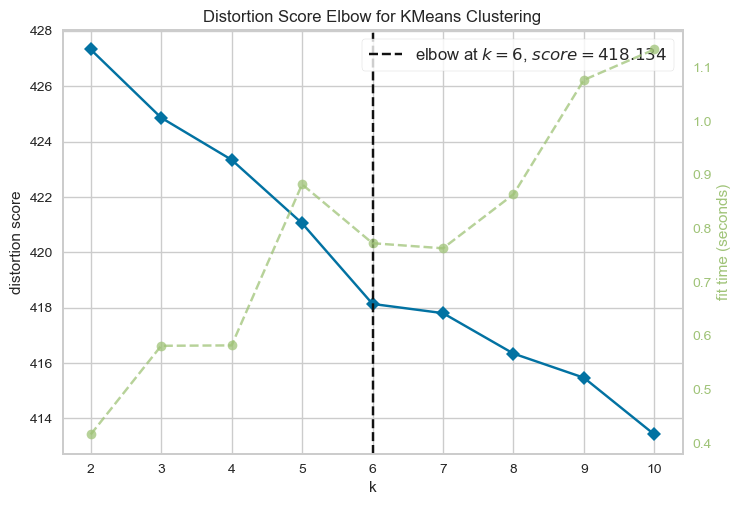

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [97]:
from yellowbrick.cluster import KElbowVisualizer
# Entraînement de l'algorithme k-means
from sklearn.cluster import KMeans
model = KElbowVisualizer(KMeans( random_state=0 ),k=10)
model.fit(transform)
model.show()

In [98]:

kmeans = KMeans(n_clusters=6,n_init=25,random_state=2)

In [99]:
mod=kmeans.fit(transform) 

In [100]:
pred=mod.fit_predict(transform)

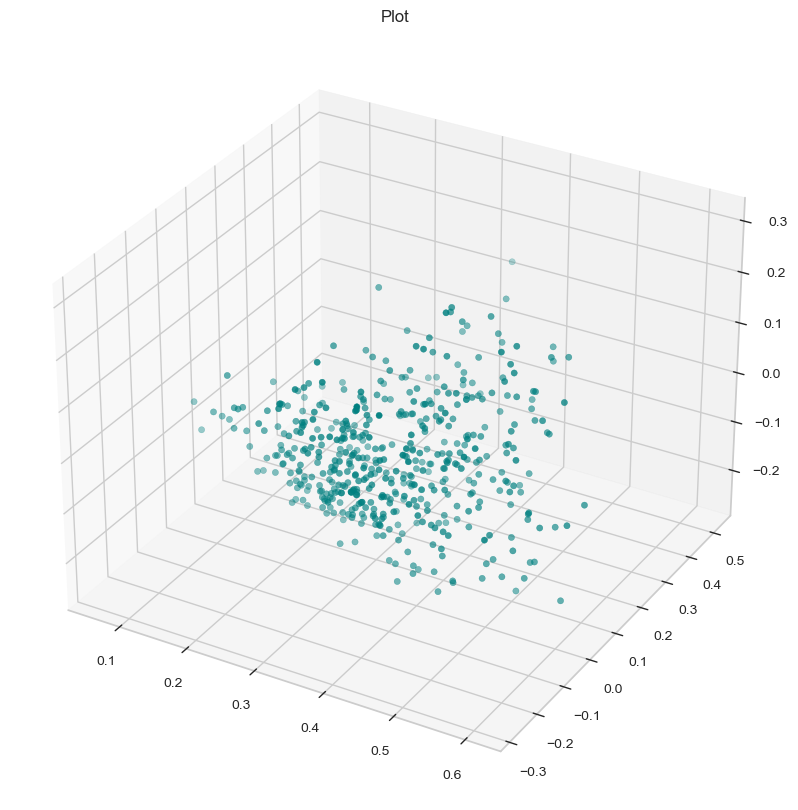

In [101]:
# print((Xx))
# Visualisation des résultats
from sklearn.decomposition import TruncatedSVD

ddd = TruncatedSVD(3)
ddd.fit(transform)
dfx = pd.DataFrame(ddd.transform(transform), columns=(['col1', 'col2','col3']))
dfx

fig = plt.figure(figsize=(20, 10))
axis = fig.add_subplot(111, projection='3d')

axis.scatter(dfx['col1'], dfx['col2'],dfx['col3'], c='teal', marker='o')
plt.title('Plot')
plt.show()

         col1      col2      col3  cluster
0    0.161173 -0.068420 -0.000918        2
1    0.240688 -0.045425 -0.020052        2
2    0.319430 -0.023877 -0.186362        1
3    0.337226 -0.091885 -0.004440        2
4    0.386860 -0.153916  0.030408        4
..        ...       ...       ...      ...
495  0.411540 -0.150509  0.008384        1
496  0.404321  0.152909  0.199342        5
497  0.374142  0.045606 -0.066748        2
498  0.324978  0.007581 -0.030784        1
499  0.202053  0.144923 -0.001659        2

[500 rows x 4 columns]


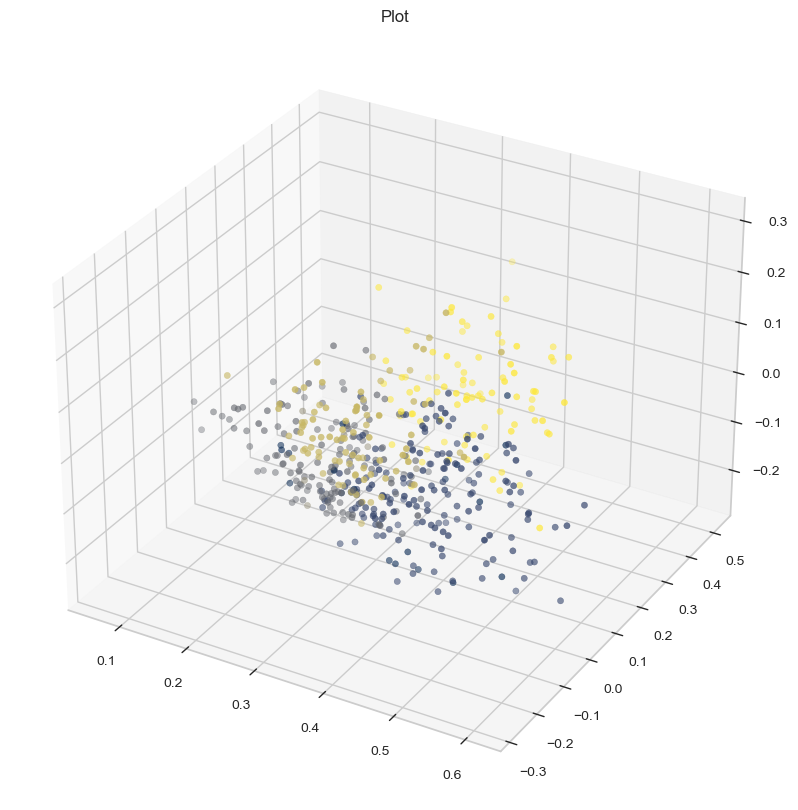

In [102]:
dfx['cluster']=pred
print(dfx)
fig = plt.figure(figsize=(20, 10))
axis = fig.add_subplot(111, projection='3d')

axis.scatter(dfx['col1'], dfx['col2'],dfx['col3'], c=dfx['cluster'], marker='o', cmap='cividis')
plt.title('Plot')
plt.show()

In [109]:
df['cluster']=pred
for i in range(0, 3):
    print(df[df['cluster']==i])



                                                     0  tar  cluster
7    b'I\'m gettin\' sick of movies that sound ente...    2        0
10   b'Witchy Hildegard Knef traps a group of peopl...    1        0
69   b"The four leads are very effective as the dis...    0        0
125  b"A really very bad movie, with a very few goo...    1        0
175  b'How can you tell that a horror movie is terr...    1        0
182  b'There are some films that every Horror fan o...    0        0
218  b'"Witchery" might just be the most incoherent...    1        0
247  b'This film features two of my favorite guilty...    1        0
258  b"An Italian/American co-production co-starrin...    1        0
290  b"This only gets bashed because it stars David...    1        0
297  b'Basically the exact same movie as "House of ...    1        0
333  b"Story of a man who has unnatural feelings fo...    0        0
349  b'There are many different versions of this on...    1        0
397  b"This film seemed way too lo